In [1]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

In [2]:
# Load the dataset from the csv file using pandas
data = pd.read_csv("/content/creditcard.csv")

In [3]:
# Grab a peek at the data
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [4]:
# Print the shape of the data
# data = data.sample(frac = 0.1, random_state = 48)
print(data.shape)
print(data.describe())

(8003, 31)
               Time           V1           V2           V3           V4  \
count   8003.000000  8003.000000  8003.000000  8003.000000  8003.000000   
mean    4282.374859    -0.296710     0.293514     0.899641     0.214580   
std     3219.334854     1.498257     1.283110     1.089277     1.444693   
min        0.000000   -23.066842   -25.640527   -12.389545    -4.657545   
25%     1544.500000    -1.045597    -0.235533     0.373551    -0.685016   
50%     3641.000000    -0.415496     0.332384     0.947931     0.220072   
75%     6733.500000     1.124283     0.947539     1.597879     1.127513   
max    10991.000000     1.685314     8.261750     4.101716     7.380245   

                V5           V6           V7           V8           V9  ...  \
count  8003.000000  8003.000000  8003.000000  8003.000000  8003.000000  ...   
mean     -0.025719     0.155478    -0.027898    -0.070443     0.657929  ...   
std       1.168204     1.323078     1.062528     1.330190     1.155643  ... 

In [5]:
# Determine number of fraud cases in dataset
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.003134010279553717
Fraud Cases: 25
Valid Transactions: 7977


In [7]:
print("Amount details of the fraudulent transaction")
fraud.Amount.describe()

Amount details of the fraudulent transaction


,Amount
count,25.000000
mean,106.308400
std,372.676883
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1809.680000


In [8]:
print("details of valid transaction")
valid.Amount.describe()

details of valid transaction


,Amount
count,7977.000000
mean,65.127652
std,193.785392
min,0.000000
25%,4.870000
50%,15.950000
75%,54.750000
max,7712.430000


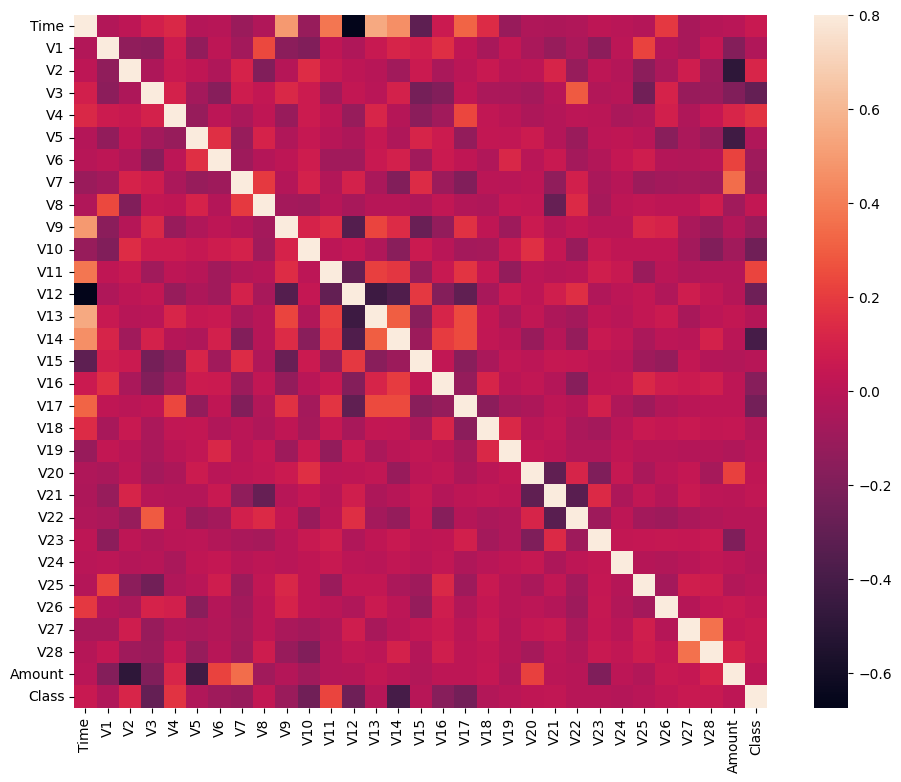

In [9]:
# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [10]:
# dividing the X and the Y from the dataset
X = data.drop(['Class'], axis = 1)
Y = data["Class"]
print(X.shape)
print(Y.shape)
# getting just the values for the sake of processing
# (its a numpy array with no columns)
xData = X.values
yData = Y.values

(8003, 30)
(8003,)


In [11]:
# Using Scikit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(
        xData, yData, test_size = 0.2, random_state = 42)

In [24]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Handle missing values by imputing with the mean
imputer = SimpleImputer(strategy='mean')
xTrain = imputer.fit_transform(xTrain)
xTest = imputer.transform(xTest)

# Random forest model creation and training
rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)

# Making predictions
yPred = rfc.predict(xTest)

In [23]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix

# Remove NaN values from yTest and the corresponding predictions in yPred
mask = ~np.isnan(yTest)
yTest_clean = yTest[mask]
yPred_clean = yPred[mask]

# Evaluating the classifier
acc = accuracy_score(yTest_clean, yPred_clean)
print("The accuracy is {}".format(acc))

# Assuming binary classification; if multi-class, specify 'average' parameter
prec = precision_score(yTest_clean, yPred_clean, average='binary')
print("The precision is {}".format(prec))

rec = recall_score(yTest_clean, yPred_clean, average='binary')
print("The recall is {}".format(rec))

f1 = f1_score(yTest_clean, yPred_clean, average='binary')
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(yTest_clean, yPred_clean)
print("The Matthews correlation coefficient is {}".format(MCC))

# print the confusion matrix
print("Confusion Matrix:\n", confusion_matrix(yTest_clean, yPred_clean))


The accuracy is 1.0
The precision is 1.0
The recall is 1.0
The F1-Score is 1.0
The Matthews correlation coefficient is 1.0
Confusion Matrix:
 [[1596    0]
 [   0    4]]


In [26]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('/content/creditcard.csv')

# Sample 10% of the data
df_sampled = df.sample(frac=0.1, random_state=42)

# Save the sampled file
df_sampled.to_csv('sampled_file.csv', index=False)